In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.3 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293634 sha256=0a8c78a808e26ff03cbf05cbfb32a08ffb64393c6bdb8c13ff0fa60b934a477e
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout

2024-08-16 15:15:03.540852: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 15:15:03.541017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 15:15:03.696782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:

# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Load NASDAQ Data from yfinance
ticker = "^IXIC"  # NASDAQ Composite Index
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")
data = data[['Close']].values

# Step 2: Preprocess the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Function to create a dataset with look_back (window size)
def create_dataset(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [5]:

look_back = 60  # The number of previous time steps to use as input variables to predict the next time period
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshaping for LSTM [samples, time steps, features]

# Split the data into training and test sets
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [6]:
# Step 3: Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0089
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 7.1171e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.9993e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.7333e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 6.3008e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.4210e-04
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.1079e-04
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.4753e-04
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 4.1760e-04
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.7711e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.2837e-04
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.5162e-04
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.5014e-04
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3.7993e-04
Epoch 15/20
81/81 ━

In [8]:
# Step 4: Build CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=50, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0117
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8639e-04
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2658e-04
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4655e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0088e-04
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4224e-04
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6101e-04
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3615e-04
Epoch 15/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [10]:

# Step 5: Evaluate and Compare Models on MAPE
# Make predictions with both models
lstm_predictions = lstm_model.predict(X_test)
cnn_predictions = cnn_model.predict(X_test)

# Inverse scale predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
cnn_predictions = scaler.inverse_transform(cnn_predictions)
y_test = scaler.inverse_transform([y_test])

# Calculate MAPE for both models
lstm_mape = MAPE(y_test[0], lstm_predictions[:, 0])
cnn_mape = MAPE(y_test[0], cnn_predictions[:, 0])

print(f"LSTM MAPE: {lstm_mape}")
print(f"CNN MAPE: {cnn_mape}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
LSTM MAPE: 0.024447471507412763
CNN MAPE: 0.04264002610909104


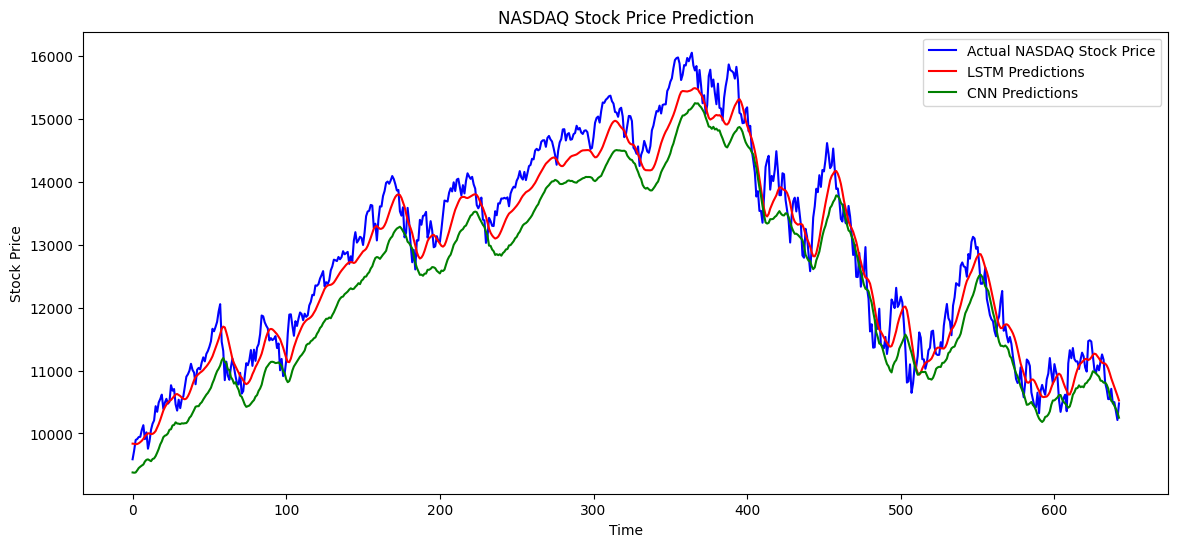

In [11]:
# Step 6: Plot the Predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test[0], color='blue', label='Actual NASDAQ Stock Price')
plt.plot(lstm_predictions[:, 0], color='red', label='LSTM Predictions')
plt.plot(cnn_predictions[:, 0], color='green', label='CNN Predictions')
plt.title('NASDAQ Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()